[YouTube Tutorial by Younes Lab](https://www.youtube.com/watch?v=R25dZ5XLdDA)

# Plan of Action
1. Define your equation using variables and functions.
2. Define intial conditions.
3. Use `sympy` to solve the differential equation.
4. Convert analytical solution to numerical form if needed.
5. Plot the results using `matplotlib`.

In [25]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

# 1. Define the equation


The Differential Equation of a damped oscillator is:
$$
{\ddot{x}+ 2\zeta\omega_n\dot{x} + \omega_n^2 x = F(t)}
$$

In [15]:
# constants zeta, omega
zeta, omega = smp.symbols("\zeta \omega_n",positive = True, real = True)

# variable t
t = smp.symbols("t",real = True, positive = True)

# Functions x(t), F(t). Check the deviation below
x = smp.Function("x")(t)
F = smp.Function("F")(t)

#### Start Slight Deviation


smp.Function

In [17]:
# Example
x**2 + F

F(t) + x(t)**2

In [18]:
type(x**2+F)

sympy.core.add.Add

In [12]:
x = smp.Function("x")
type(x)

sympy.core.function.UndefinedFunction

In [10]:
x(t) # is a function

x(t)

In [11]:
type(x(t))

x

#### End Slight Deviation


The Differential Equation of a damped oscillator is:
$$
{\ddot{x}+ 2\zeta\omega_n\dot{x} + \omega_n^2 x = F(t)}
$$

In [ ]:
# eqn = \ddot{x}+ 2\zeta\omega_n\dot{x} + \omega_n^2 x - F(t) = 0
dot_x = smp.diff(x, t)
ddot_x = smp.diff(x, t, 2)


# Way 1 - defining the equation = 0
eqn = ddot_x + (2 * zeta * omega * dot_x) + omega * x - F
eqn

2*\omega_n*\zeta*Derivative(x(t), t) + \omega_n*x(t) - F(t) + Derivative(x(t), (t, 2))

In [24]:
# Way 2 - defining the equation with lhs and rhs
lhs = ddot_x + (2 * zeta * omega * dot_x) + omega * x
rhs = F

eqn2 = smp.Eq(lhs,rhs)
eqn2

Eq(2*\omega_n*\zeta*Derivative(x(t), t) + \omega_n*x(t) + Derivative(x(t), (t, 2)), F(t))

#### Another slight deviation

\dot{x} and \ddot{x} in sympy

In [ ]:
dx_dt = smp.diff(x, t)
d2x_dt2 = smp.diff(x, t, 2)
dx_dt

In [20]:
d2x_dt2

Derivative(x(t), (t, 2))

In [21]:
smp.integrate(x,t)

Integral(x(t), t)

#### End Slight Deviation

# 2. Solve the differential equation

## 1. Without initial conditions

In [39]:
solution = smp.dsolve(eqn2, x)
solution

Eq(x(t), C1*exp(t*(sqrt(\omega_n)*sqrt(\omega_n*\zeta**2 - 1) - \omega_n*\zeta)) + C2*exp(-t*(sqrt(\omega_n)*sqrt(\omega_n*\zeta**2 - 1) + \omega_n*\zeta)) + exp(t*(sqrt(\omega_n)*sqrt(\omega_n*\zeta**2 - 1) - \omega_n*\zeta))*Integral(F(t)*exp(-sqrt(\omega_n)*t*sqrt(\omega_n*\zeta**2 - 1))*exp(\omega_n*\zeta*t), t)/(2*sqrt(\omega_n)*sqrt(\omega_n*\zeta**2 - 1)) - exp(-t*(sqrt(\omega_n)*sqrt(\omega_n*\zeta**2 - 1) + \omega_n*\zeta))*Integral(F(t)*exp(sqrt(\omega_n)*t*sqrt(\omega_n*\zeta**2 - 1))*exp(\omega_n*\zeta*t), t)/(2*sqrt(\omega_n)*sqrt(\omega_n*\zeta**2 - 1)))

There was no constraing on F(t) thus we get a general solution.


## 2. Initial conditions

This is how the dsovle is defined in the `sympy` library:
ics stands for initial conditions, and it is a dictionary of the form `{func(t0): value}`.

>````python
>def dsolve(eq, func=None, hint="default", simplify=True,
>    ics= None, xi=None, eta=None, x0=0, n=6, **kwargs):
>    r"""
>        **Details**
>          ``ics`` is the set of initial/boundary conditions for the differential equation.
>          It should be given in the form of ``{f(x0): x1, f(x).diff(x).subs(x, x2):
>          x3}`` and so on.  For power series solutions, if no initial
>          conditions are specified ``f(0)`` is assumed to be ``C0`` and the power
>          series solution is calculated about 0.
>    """
>````

## 3. With initial conditions

In [ ]:
# initial conditions
# The documentation asks us to do something like{f(x0): x1, f(x).diff(x).subs(x, x2):x3}. Its better to use:
    # x(t = 0) = 1 is equivalent to x.subs(t,0) = 1
initconds = {
    x.subs(t, 0) : 1,
    ddot_x.subs(t, 0): 0
}
# Assume the motion is constrained between 0 and 1(x is instead x/L)
solutionics = smp.dsolve(eqn2, x, ics = initconds)
solutionics

Eq(x(t), (-2*\omega_n**(7/2)*\zeta**4/(4*\omega_n**3*\zeta**3*sqrt(\omega_n*\zeta**2 - 1) - 4*\omega_n**2*\zeta*sqrt(\omega_n*\zeta**2 - 1)) + 2*\omega_n**(5/2)*\zeta**3*Integral(F(t)*exp(sqrt(\omega_n)*t*sqrt(\omega_n*\zeta**2 - 1))*exp(\omega_n*\zeta*t), (t, 0))/(4*\omega_n**3*\zeta**3*sqrt(\omega_n*\zeta**2 - 1) - 4*\omega_n**2*\zeta*sqrt(\omega_n*\zeta**2 - 1)) + 3*\omega_n**(5/2)*\zeta**2/(4*\omega_n**3*\zeta**3*sqrt(\omega_n*\zeta**2 - 1) - 4*\omega_n**2*\zeta*sqrt(\omega_n*\zeta**2 - 1)) - \omega_n**(3/2)*\zeta**2*F(0)/(4*\omega_n**3*\zeta**3*sqrt(\omega_n*\zeta**2 - 1) - 4*\omega_n**2*\zeta*sqrt(\omega_n*\zeta**2 - 1)) - 2*\omega_n**(3/2)*\zeta*Integral(F(t)*exp(sqrt(\omega_n)*t*sqrt(\omega_n*\zeta**2 - 1))*exp(\omega_n*\zeta*t), (t, 0))/(4*\omega_n**3*\zeta**3*sqrt(\omega_n*\zeta**2 - 1) - 4*\omega_n**2*\zeta*sqrt(\omega_n*\zeta**2 - 1)) - \omega_n**(3/2)/(4*\omega_n**3*\zeta**3*sqrt(\omega_n*\zeta**2 - 1) - 4*\omega_n**2*\zeta*sqrt(\omega_n*\zeta**2 - 1)) + sqrt(\omega_n)*F(0

In [51]:
# defining the constants
const = [(zeta,20),(omega,1)]
solutionics.subs(const)

Eq(x(t), (-sqrt(399)*F(0)/31920 + sqrt(399)*Integral(F(t)*exp(20*t)*exp(sqrt(399)*t), (t, 0))/798 - 799*sqrt(399)/31920 + 1/2)*exp(-t*(sqrt(399) + 20)) + (sqrt(399)*F(0)/31920 - sqrt(399)*Integral(F(t)*exp(20*t)*exp(-sqrt(399)*t), (t, 0))/798 + 1/2 + 799*sqrt(399)/31920)*exp(t*(-20 + sqrt(399))) + sqrt(399)*exp(t*(-20 + sqrt(399)))*Integral(F(t)*exp(20*t)*exp(-sqrt(399)*t), t)/798 - sqrt(399)*exp(-t*(sqrt(399) + 20))*Integral(F(t)*exp(20*t)*exp(sqrt(399)*t), t)/798)

In [56]:
# now if you do the same thing with F(t) = sin(t)
# Way 2 - defining the equation with lhs and rhs
lhs = ddot_x + (2 * zeta * omega * dot_x) + omega * x
rhs = smp.sin(t)

eqn2 = smp.Eq(lhs, rhs)
# initial conditions
# The documentation asks us to do something like{f(x0): x1, f(x).diff(x).subs(x, x2):x3}. Its better to use:
# x(t = 0) = 1 is equivalent to x.subs(t,0) = 1
initconds = {
    x.subs(t, 0): 1,
    x.subs(t, 1): 0,
    # ddot_x.subs(t, 0): 0
}
# Assume the motion is constrained between 0 and 1(x is instead x/L)
solutionics = smp.dsolve(eqn2, x, ics = initconds)
solutionics

Eq(x(t), -2*\omega_n*\zeta*cos(t)/(4*\omega_n**2*\zeta**2 + \omega_n**2 - 2*\omega_n + 1) + \omega_n*sin(t)/(4*\omega_n**2*\zeta**2 + \omega_n**2 - 2*\omega_n + 1) + (-4*\omega_n**2*\zeta**2/(4*\omega_n**2*\zeta**2*exp(2*sqrt(\omega_n)*sqrt(\omega_n*\zeta**2 - 1)) - 4*\omega_n**2*\zeta**2 + \omega_n**2*exp(2*sqrt(\omega_n)*sqrt(\omega_n*\zeta**2 - 1)) - \omega_n**2 - 2*\omega_n*exp(2*sqrt(\omega_n)*sqrt(\omega_n*\zeta**2 - 1)) + 2*\omega_n + exp(2*sqrt(\omega_n)*sqrt(\omega_n*\zeta**2 - 1)) - 1) - \omega_n**2/(4*\omega_n**2*\zeta**2*exp(2*sqrt(\omega_n)*sqrt(\omega_n*\zeta**2 - 1)) - 4*\omega_n**2*\zeta**2 + \omega_n**2*exp(2*sqrt(\omega_n)*sqrt(\omega_n*\zeta**2 - 1)) - \omega_n**2 - 2*\omega_n*exp(2*sqrt(\omega_n)*sqrt(\omega_n*\zeta**2 - 1)) + 2*\omega_n + exp(2*sqrt(\omega_n)*sqrt(\omega_n*\zeta**2 - 1)) - 1) + 2*\omega_n*\zeta*exp(sqrt(\omega_n)*sqrt(\omega_n*\zeta**2 - 1))*exp(\omega_n*\zeta)*cos(1)/(4*\omega_n**2*\zeta**2*exp(2*sqrt(\omega_n)*sqrt(\omega_n*\zeta**2 - 1)) - 4*\om

In [78]:
solicsk = solutionics.subs(const)

#### Slight deviation - using `sympy` to solve the differential equation


In [33]:
example = t**2 - 2*t + 4
smp.solve(example,t) # because t was real and positive

[]

In [34]:
m = smp.symbols("m")
example = m**2 - 2*m + 4
smp.solve(example, m)

[1 - sqrt(3)*I, 1 + sqrt(3)*I]

In [35]:
smp.solve(example, m)[0]

1 - sqrt(3)*I

In [36]:
smp.solve(example, m)[1]

1 + sqrt(3)*I

In [ ]:
# for solving differential equation, instead of smp.solve, use smp.dsolve


#### End Slight Deviation

# 3. Convert analytical solution to numerical form.

Use `smp.lambdify` to convert the symbolic function to a numerical function.

#### Slight deviation - smp.lambdify

In [66]:
eq = t+1
eq_num = smp.lambdify(t, eq)

In [ ]:
eq_num(4) # similar to creating a lambda function

5

In [72]:
solutionics # is an equation

Eq(x(t), -2*\omega_n*\zeta*cos(t)/(4*\omega_n**2*\zeta**2 + \omega_n**2 - 2*\omega_n + 1) + \omega_n*sin(t)/(4*\omega_n**2*\zeta**2 + \omega_n**2 - 2*\omega_n + 1) + (-4*\omega_n**2*\zeta**2/(4*\omega_n**2*\zeta**2*exp(2*sqrt(\omega_n)*sqrt(\omega_n*\zeta**2 - 1)) - 4*\omega_n**2*\zeta**2 + \omega_n**2*exp(2*sqrt(\omega_n)*sqrt(\omega_n*\zeta**2 - 1)) - \omega_n**2 - 2*\omega_n*exp(2*sqrt(\omega_n)*sqrt(\omega_n*\zeta**2 - 1)) + 2*\omega_n + exp(2*sqrt(\omega_n)*sqrt(\omega_n*\zeta**2 - 1)) - 1) - \omega_n**2/(4*\omega_n**2*\zeta**2*exp(2*sqrt(\omega_n)*sqrt(\omega_n*\zeta**2 - 1)) - 4*\omega_n**2*\zeta**2 + \omega_n**2*exp(2*sqrt(\omega_n)*sqrt(\omega_n*\zeta**2 - 1)) - \omega_n**2 - 2*\omega_n*exp(2*sqrt(\omega_n)*sqrt(\omega_n*\zeta**2 - 1)) + 2*\omega_n + exp(2*sqrt(\omega_n)*sqrt(\omega_n*\zeta**2 - 1)) - 1) + 2*\omega_n*\zeta*exp(sqrt(\omega_n)*sqrt(\omega_n*\zeta**2 - 1))*exp(\omega_n*\zeta)*cos(1)/(4*\omega_n**2*\zeta**2*exp(2*sqrt(\omega_n)*sqrt(\omega_n*\zeta**2 - 1)) - 4*\om

In [76]:
solrhs = solutionics.rhs # is an expression

#### End Slight Deviation

In [80]:
solutionics_num = smp.lambdify(t, solicsk.rhs)

t_num = np.linspace(0,10,1000)
solutionics_num(t_num)

array([ 1.00000000e+00,  6.66540150e-01,  4.43050628e-01,  2.93266191e-01,
        1.92881166e-01,  1.25605416e-01,  8.05209716e-02,  5.03103982e-02,
        3.00694061e-02,  1.65110446e-02,  7.43233395e-03,  1.35679341e-03,
       -2.70514434e-03, -5.41670769e-03, -7.22240650e-03, -8.42016118e-03,
       -9.20964521e-03, -9.72468505e-03, -1.00549754e-02, -1.02606329e-02,
       -1.03819507e-02, -1.04459357e-02, -1.04706904e-02, -1.04683493e-02,
       -1.04470474e-02, -1.04122387e-02, -1.03675809e-02, -1.03155278e-02,
       -1.02577263e-02, -1.01952824e-02, -1.01289401e-02, -1.00592004e-02,
       -9.98640185e-03, -9.91077408e-03, -9.83247375e-03, -9.75160876e-03,
       -9.66825437e-03, -9.58246407e-03, -9.49427681e-03, -9.40372189e-03,
       -9.31082221e-03, -9.21559646e-03, -9.11806059e-03, -9.01822877e-03,
       -8.91611406e-03, -8.81172887e-03, -8.70508523e-03, -8.59619498e-03,
       -8.48506992e-03, -8.37172190e-03, -8.25616286e-03, -8.13840491e-03,
       -8.01846028e-03, -

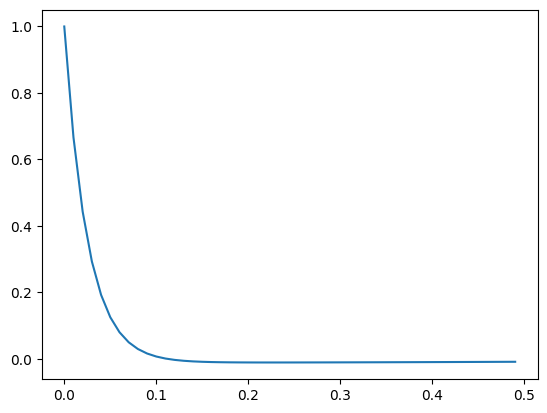

In [84]:
plt.plot(t_num[:50], solutionics_num(t_num)[:50])

# Final Code

In [3]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# constants zeta, omega
zeta, omega = smp.symbols("\zeta \omega_n", positive=True, real=True)

# variable t
t = smp.symbols("t", real=True, positive=True)

# Functions x(t), F(t).
x = smp.Function("x")(t)
F = smp.Function("F")(t)
dot_x = smp.diff(x, t)
ddot_x = smp.diff(x, t, 2)

In [8]:
def dsol(F):
    lhs = ddot_x + (2 * zeta * omega * dot_x) + (omega**2) * x
    eqn2 = smp.Eq(lhs, F)
    initconds = {
        x.subs(t, 0): 1,
        x.subs(t, 1): 0,
    }

    # Assume the motion is constrained between 0 and 1(x is instead x/L)
    # And timeperiod of 4 seconds
    return smp.dsolve(eqn2, x, ics=initconds)

Symbolic solution:
$\displaystyle x{\left(t \right)} = \left(- \frac{64.96}{-64.36 + 64.36 e^{5.96992462263972 i}} + \frac{0.809915284545602 e^{2.98496231131986 i} \cos{\left(1 \right)}}{-64.36 + 64.36 e^{5.96992462263972 i}} - \frac{10.798870460608 e^{2.98496231131986 i} \sin{\left(1 \right)}}{-64.36 + 64.36 e^{5.96992462263972 i}}\right) e^{3 t \left(-0.1 + 0.99498743710662 i\right)} + 0.124300807955252 \sin{\left(t \right)} - 0.00932256059664388 \cos{\left(t \right)} + \left(\frac{10.798870460608 e^{2.98496231131986 i} \sin{\left(1 \right)}}{-64.36 + 64.36 e^{5.96992462263972 i}} - \frac{0.809915284545602 e^{2.98496231131986 i} \cos{\left(1 \right)}}{-64.36 + 64.36 e^{5.96992462263972 i}} + \frac{64.96 e^{5.96992462263972 i}}{-64.36 + 64.36 e^{5.96992462263972 i}}\right) e^{- 3 t \left(0.1 + 0.99498743710662 i\right)}$


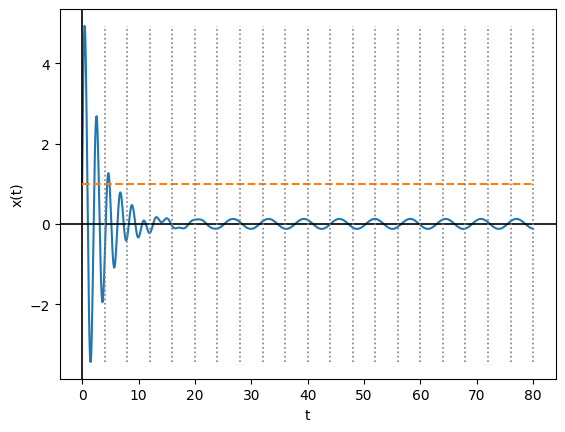

In [11]:
# defining the constants
def main(zeta_const: int, omega_const: int, t_range: int, Forcem = smp.sin(t))->None:
    const = [(zeta, zeta_const), (omega, omega_const)]
    solicsk = dsol(Forcem).subs(const)

    solutionics_num = smp.lambdify(t, solicsk.rhs)

    t_num = np.linspace(0, t_range, 1000)
    solicsk_t = solutionics_num(t_num)
    
    print("Symbolic solution:")
    print(solicsk._repr_latex_())

    plt.plot(t_num, solicsk_t)    

    plt.axhline(0, color='black', linestyle='-', linewidth=1.2)
    plt.axvline(0, color='black', linestyle='-', linewidth=1.2)

    # x limit of amplitude
    plt.plot([0, t_num[-1]], [1, 1], linestyle='--')
    for i in range(int(t_num[-1] // 4)):
        # The mistake: solicsk_t.argmin() and solicsk_t.argmax() do not exist for numpy arrays.
        # Use np.min(solicsk_t) and np.max(solicsk_t) instead.
        # Also, to make lines dotted and fading, use linestyle=':', and alpha for fading.
        plt.plot(
            [4 * (i + 1), 4 * (i + 1)],
            [np.min(solicsk_t), np.max(solicsk_t)],
            linestyle=':',
            color='gray',
            # alpha=1.0 - (i / int(t_num[-1] // 4)),
            linewidth=1.2
        )
    plt.xlabel("t")
    plt.ylabel("x(t)")

main(0.1,3,80, smp.sin(t))